In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Clean Coles Woolworths Dated (1).xlsx to Clean Coles Woolworths Dated (1).xlsx


In [ ]:
import pandas as pd

# file is in excel
file_name = next(iter(uploaded))
# load all sheets into df
xl = pd.ExcelFile(file_name)

sheets = xl.sheet_names

# find sheets with specific word in the name

word = "Woolworths 1" # word to find

woolworths_sheets = {sheet_name :xl.parse(sheet_name) for sheet_name in sheets if word.lower() in sheet_name.lower()}

## print loaded sheets
print("Loaded Sheets:", list(woolworths_sheets.keys()))

Loaded Sheets: ['Sun4AugWoolworths 1', 'Tue03SepWoolworths 1', 'Tue10SepWoolworths 1', 'Tue27AugWoolworths 1', 'Wed04SepWoolworths 1']


In [ ]:
import re
from datetime import datetime

# Function to clean the text
date_pattern = re.compile(r'\d{1,2}[A-Za-z]{3}')

# Dictionary to hold all reformatted data
all_data = {}

column_names = ["Product Code",	"Category",	"Item Name",	"Best Price",	"Best Unit Price",	"Item Price",	"Unit Price"]

In [ ]:
for sheet_name, data in woolworths_sheets.items():
    # Extract date from sheet name
    date_match = date_pattern.search(sheet_name)
    # print(date_match)
    print(f"SheetName: {sheet_name} ")
    if date_match:
        date_str = date_match.group() +"24"
        print(date_str)
        # Convert date string to datetime object
        date = datetime.strptime(date_str, '%d%b%y').date()
        # Select and rename columns as needed
        data = data[column_names]
        data['Date'] = date
        all_data[date] = data
    else:
        print(f"No date found in sheet name: {sheet_name}")

SheetName: Sun4AugWoolworths 1 
4Aug24
SheetName: Tue03SepWoolworths 1 
03Sep24
SheetName: Tue10SepWoolworths 1 
10Sep24
SheetName: Tue27AugWoolworths 1 
27Aug24
SheetName: Wed04SepWoolworths 1 
04Sep24


<ipython-input-4-fa1ba08773a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = date
<ipython-input-4-fa1ba08773a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = date
<ipython-input-4-fa1ba08773a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [ ]:
test_date = list(all_data.keys())[0]

data = all_data[test_date]
print(data.head())

print("Date:", test_date)



   Product Code     Category                    Item Name  Best Price  \
0        133211  Fruit & Veg       Cavendish Bananas Each        0.77   
1        134034  Fruit & Veg            Fresh Tomato Each        0.65   
2        144607  Fruit & Veg     Strawberries 250g Punnet        4.00   
3        105919  Fruit & Veg  Fresh Pink Lady Apples Each        0.86   
4        169438  Fruit & Veg          Truss Tomatoes Each        0.83   

  Best Unit Price  Item Price    Unit Price        Date  
0     $0.77 / 1EA        0.77   $0.77 / 1EA  2024-08-04  
1     $0.65 / 1EA        0.65   $0.65 / 1EA  2024-08-04  
2    $16.00 / 1KG        4.00  $16.00 / 1KG  2024-08-04  
3     $0.86 / 1EA        0.86   $0.86 / 1EA  2024-08-04  
4     $0.83 / 1EA        0.83   $0.83 / 1EA  2024-08-04  
Date: 2024-08-04


In [ ]:
# Identify duplicates based on 'Product Code' column
duplicates = data[data.duplicated('Product Code', keep=False)]

# Count unique product codes that are duplicated
num_unique_duplicates = duplicates['Product Code'].nunique()

print(f"Number of unique product codes with duplicates on {test_date}: {num_unique_duplicates}")


# Check and display rows where 'Product Code' is duplicated
if not duplicates.empty:
    # Sample a few product codes to display
    sample_product_codes = duplicates['Product Code'].unique()[:5]  # Adjust the slice as needed

    for product_code in sample_product_codes:
        print(f"Rows for Product Code {product_code}:")
        display(duplicates[duplicates['Product Code'] == product_code])

Number of unique product codes with duplicates on 2024-08-04: 2351
Rows for Product Code 524322:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
24,524322,Fruit & Veg,Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1909,524322,"Dairy, Eggs & Fridge",Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


Rows for Product Code 315670:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
100,315670,Fruit & Veg,Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04
1966,315670,"Dairy, Eggs & Fridge",Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04


Rows for Product Code 705439:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
104,705439,Fruit & Veg,Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1971,705439,"Dairy, Eggs & Fridge",Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


Rows for Product Code 714823:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
120,714823,Fruit & Veg,Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04
2026,714823,"Dairy, Eggs & Fridge",Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04


Rows for Product Code 531041:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
134,531041,Fruit & Veg,Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04
2070,531041,"Dairy, Eggs & Fridge",Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04


In [ ]:
if not duplicates.empty:
    # Sample a few product codes to display
    sample_product_codes = duplicates['Product Code'].unique()[:11]  # Adjust the slice as needed

    for product_code in sample_product_codes:
        # print(f"Rows for Product Code {product_code}:")
        display(duplicates[duplicates['Product Code'] == product_code])


#after manually check nearly all products have same unit price, best price, and price, so we can safely remove all duplicates from data frame

,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
24,524322,Fruit & Veg,Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1909,524322,"Dairy, Eggs & Fridge",Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
100,315670,Fruit & Veg,Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04
1966,315670,"Dairy, Eggs & Fridge",Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
104,705439,Fruit & Veg,Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1971,705439,"Dairy, Eggs & Fridge",Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
120,714823,Fruit & Veg,Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04
2026,714823,"Dairy, Eggs & Fridge",Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
134,531041,Fruit & Veg,Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04
2070,531041,"Dairy, Eggs & Fridge",Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
141,233376,Fruit & Veg,Woolworths Caesar Salad Kit 290g,5.5,$18.97 / 1KG,5.5,$18.97 / 1KG,2024-08-04
2109,233376,"Dairy, Eggs & Fridge",Woolworths Caesar Salad Kit 290g,5.5,$18.97 / 1KG,5.5,$18.97 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
149,921080,Fruit & Veg,Just Veg. Carrot Sticks 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04
2130,921080,"Dairy, Eggs & Fridge",Just Veg. Carrot Sticks 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
153,379518,Fruit & Veg,Woolworths Baby Spinach & Rocket 60g,2.0,$33.33 / 1KG,2.0,$33.33 / 1KG,2024-08-04
2141,379518,"Dairy, Eggs & Fridge",Woolworths Baby Spinach & Rocket 60g,2.0,$33.33 / 1KG,2.0,$33.33 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
158,317566,Fruit & Veg,Woolworths Baby Leaf With Beetroot & Carrot 180g,4.0,$22.22 / 1KG,4.0,$22.22 / 1KG,2024-08-04
2159,317566,"Dairy, Eggs & Fridge",Woolworths Baby Leaf With Beetroot & Carrot 180g,4.0,$22.22 / 1KG,4.0,$22.22 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
169,748851,Fruit & Veg,Woolworths Celery Heart Each,4.0,$4.00 / 1EA,4.0,$4.00 / 1EA,2024-08-04
9377,748851,Snacks & Confectionery,Woolworths Celery Heart Each,4.0,$4.00 / 1EA,4.0,$4.00 / 1EA,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
176,921142,Fruit & Veg,Just Veg. Carrot Shred 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04
2173,921142,"Dairy, Eggs & Fridge",Just Veg. Carrot Shred 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04


In [ ]:
# removing duplicate rows from all sheets based on product code
for date, df in all_data.items():
    # Remove duplicates - keep the first one
    unique_df = df.drop_duplicates(subset='Product Code', keep='first')

    # Replace the og DF with the deduplicated DF
    all_data[date] = unique_df

    # Optionally print out some information
    print(f"Processed {date}: reduced from {len(df)} to {len(unique_df)} rows")

Processed 2024-08-04: reduced from 22365 to 19907 rows
Processed 2024-09-03: reduced from 24570 to 21342 rows
Processed 2024-09-10: reduced from 24722 to 21459 rows
Processed 2024-08-27: reduced from 23787 to 20637 rows
Processed 2024-09-04: reduced from 24778 to 21504 rows


In [ ]:
import pandas as pd

# Create an empty DF to store all cobimned data
combined_df = pd.DataFrame()

# go through each DF in all_data and merge
for date, df in all_data.items():
    # Select the relevant columns and add a 'Date' column
    selected_data = df[['Category', 'Item Name', 'Product Code', 'Item Price', 'Best Price']].copy()
    selected_data['Date'] = pd.to_datetime(date)  # Corrected Date Format

    # show shape of each df
    print(f"Date: {date}, Shape: {selected_data.shape}")
    # Append to the combined DF
    combined_df = pd.concat([combined_df, selected_data], ignore_index=True)

    ## show increased number of rows
    print(f"Combined DF Shape: {combined_df.shape}")

# show DF
print(combined_df.shape)
print(combined_df.head())

Date: 2024-08-04, Shape: (19907, 6)
Combined DF Shape: (19907, 6)
Date: 2024-09-03, Shape: (21342, 6)
Combined DF Shape: (41249, 6)
Date: 2024-09-10, Shape: (21459, 6)
Combined DF Shape: (62708, 6)
Date: 2024-08-27, Shape: (20637, 6)
Combined DF Shape: (83345, 6)
Date: 2024-09-04, Shape: (21504, 6)
Combined DF Shape: (104849, 6)
(104849, 6)
      Category                    Item Name  Product Code  Item Price  \
0  Fruit & Veg       Cavendish Bananas Each        133211        0.77   
1  Fruit & Veg            Fresh Tomato Each        134034        0.65   
2  Fruit & Veg     Strawberries 250g Punnet        144607        4.00   
3  Fruit & Veg  Fresh Pink Lady Apples Each        105919        0.86   
4  Fruit & Veg          Truss Tomatoes Each        169438        0.83   

   Best Price       Date  
0        0.77 2024-08-04  
1        0.65 2024-08-04  
2        4.00 2024-08-04  
3        0.86 2024-08-04  
4        0.83 2024-08-04  


In [ ]:
# Set date and product code as a multi-index
combined_df.set_index(['Date', 'Product Code'], inplace=True)

# Sort the df by the index (Date and Product Code)
combined_df.sort_index(inplace=True)

# Display the df to verify the structure
print(combined_df.head())

                                       Category  \
Date       Product Code                           
2024-08-04 25            Snacks & Confectionery   
           86                            Pantry   
           168                           Pantry   
           287                           Pantry   
           326                           Pantry   

                                                                 Item Name  \
Date       Product Code                                                      
2024-08-04 25               Arnott's Caramel Crown Chocolate Biscuits 200g   
           86            Pearl River Bridge Soy Sauce Superior Light 500ml   
           168                                      Tcc Coconut Milk 400ml   
           287                              Leatherwood Organic Honey 500g   
           326                          Essentials Chunky Pasta Sauce 700g   

                         Item Price  Best Price  
Date       Product Code                      

In [ ]:
combined_df

Category  \
Date       Product Code                           
2024-08-04 25            Snacks & Confectionery   
           86                            Pantry   
           168                           Pantry   
           287                           Pantry   
           326                           Pantry   
...                                         ...   
2024-09-10 997702          Beer, Wine & Spirits   
           997704          Beer, Wine & Spirits   
           997705          Beer, Wine & Spirits   
           997833          Beer, Wine & Spirits   
           997834          Beer, Wine & Spirits   

                                                                 Item Name  \
Date       Product Code                                                      
2024-08-04 25               Arnott's Caramel Crown Chocolate Biscuits 200g   
           86            Pearl River Bridge Soy Sauce Superior Light 500ml   
           168                                      Tcc Coconut Milk 400ml   
           287                              Leatherwood Organic Honey 500g   
           326                          Essentials Chunky Pasta Sauce 700g   
...                                                                    ...   
2024-09-10 997702        Nelson County Zero Sugar Bourbon & Cola 375ml ...   
           997704                      Beck's Lager Bottles 330ml X24 Case   
           997705                       Beck's Lager Bottles 330ml X6 Pack   
           997833               Capital Brewing Co. Xpa Cans 375ml X4 Pack   
           997834              Capital Brewing Co. Xpa Cans 375ml X16 Case   

                         Item Price  Best Price  
Date       Product Code                          
2024-08-04 25                  4.00        4.00  
           86                  3.30        3.30  
           168                 2.30        2.30  
           287                14.00       14.00  
           326                 2.75        2.75  
...                             ...         ...  
2024-09-10 997702             25.00       25.00  
           997704             53.00       53.00  
           997705             20.00       20.00  
           997833             20.50       20.50  
           997834             63.00       63.00  

[104849 rows x 4 columns]

In [ ]:
!pip install pandas numpy matplotlib statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt


## resetting index
combined_df.reset_index(inplace=True)
## ensure datetime format for Date and set index as Date
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.set_index('Date', inplace=True)

In [ ]:
combined_df


,Product Code,Category,Item Name,Item Price,Best Price
Date,,,,,
2024-08-04,25,Snacks & Confectionery,Arnott's Caramel Crown Chocolate Biscuits 200g,4.00,4.00
2024-08-04,86,Pantry,Pearl River Bridge Soy Sauce Superior Light 500ml,3.30,3.30
2024-08-04,168,Pantry,Tcc Coconut Milk 400ml,2.30,2.30
2024-08-04,287,Pantry,Leatherwood Organic Honey 500g,14.00,14.00
2024-08-04,326,Pantry,Essentials Chunky Pasta Sauce 700g,2.75,2.75
...,...,...,...,...,...
2024-09-10,997702,"Beer, Wine & Spirits",Nelson County Zero Sugar Bourbon & Cola 375ml ...,25.00,25.00
2024-09-10,997704,"Beer, Wine & Spirits",Beck's Lager Bottles 330ml X24 Case,53.00,53.00
2024-09-10,997705,"Beer, Wine & Spirits",Beck's Lager Bottles 330ml X6 Pack,20.00,20.00


In [ ]:

import random
## dict to store forecasts
forecasts = {}


## get all unique product codes
product_codes = combined_df['Product Code'].unique()

# PRINT COUNT OF UNIQUE PRODS
print(f"Number of unique product codes: {len(product_codes)}")

## set seed
random.seed(42)
ProdCount = 50 #
# ProdCount = len(product_codes) # <<<<uncomment to run on whole data
# Sample a few prod codes for output and plots
sampled_product_codes = random.sample(list(product_codes),ProdCount)
## number of sheets in Gsheet
NumberofDates = len(list(all_data.keys()))

# Process each product code
for product_code in sampled_product_codes:
    # Filter data for the current product code
    product_data = combined_df[combined_df['Product Code'] == product_code]

    ts = product_data['Item Price'].astype(float).resample('D').last().fillna(method = 'ffill')
    if len(ts) >= NumberofDates:# check if we have sufficient data points
        try:
            model = auto_arima(ts, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
            forecast = model.predict(n_periods=7)# predict after 2 weeks
            # print(forecast[-1])
            forecasts[product_code] = {'forecast': forecast[-1], 'method': 'ARIMA'}
        except Exception as e:
            print(f"ARIMA model fitting failed for product code {product_code}: {str(e)}")
    else:
        # Use last available price for forecasting
        last_known_price = ts.iloc[-1]
        forecast = np.full(14, last_known_price)
        forecasts[product_code] = {'forecast': forecast[-1], 'method': 'Last Known Price'}


Number of unique product codes: 22625


<ipython-input-38-ccb20fe23b58>:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = product_data['Item Price'].astype(float).resample('D').last().fillna(method = 'ffill')
<ipython-input-38-ccb20fe23b58>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[product_code] = {'forecast': forecast[-1], 'method': 'ARIMA'}
<ipython-input-38-ccb20fe23b58>:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = product_data['Item Price'].astype(float).resample('D').last().fillna(method = 'ffill')
<ipython-input-38-ccb20fe23b58>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

<ipython-input-31-d480dbd610e0>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = combined_df[(combined_df['Product Code'] == product_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

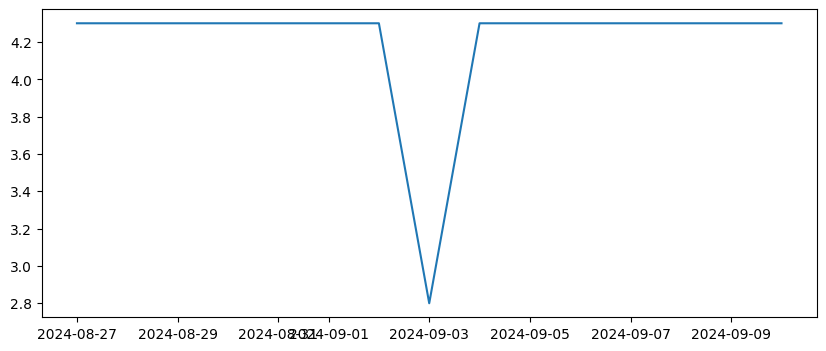

In [ ]:
import random

# Sample a few prod codes for output and plots
# sampled_product_codes = random.sample(list(product_codes), 5)

#  plots for the sampled product codes
for product_code in sampled_product_codes:
    forecast_data = forecasts[product_code]
    ts = combined_df[(combined_df['Product Code'] == product_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')

    plt.figure(figsize=(10, 4))
    plt.plot(ts.index, ts, label='Historical Prices')
    future_dates = pd.date_range(start=ts.index[-1], periods=1, freq='D')[1:]
    plt.plot(future_dates, forecast_data['forecast'], label='Forecast (14 days)', linestyle='--')
    plt.title(f'Forecast for Product Code {product_code} using {forecast_data["method"]}')
    plt.legend()
    plt.show()

    ## not so good graphs - need to improve

In [ ]:
product_data['Item Price'].astype(float).resample('D').last()

,Item Price
Date,
2024-08-27,4.3
2024-08-28,NaN
2024-08-29,NaN
2024-08-30,NaN
2024-08-31,NaN
2024-09-01,NaN
2024-09-02,NaN
2024-09-03,2.8
2024-09-04,4.3


In [ ]:
combined_df


,Product Code,Category,Item Name,Item Price,Best Price
Date,,,,,
2024-08-04,25,Snacks & Confectionery,Arnott's Caramel Crown Chocolate Biscuits 200g,4.00,4.00
2024-08-04,86,Pantry,Pearl River Bridge Soy Sauce Superior Light 500ml,3.30,3.30
2024-08-04,168,Pantry,Tcc Coconut Milk 400ml,2.30,2.30
2024-08-04,287,Pantry,Leatherwood Organic Honey 500g,14.00,14.00
2024-08-04,326,Pantry,Essentials Chunky Pasta Sauce 700g,2.75,2.75
...,...,...,...,...,...
2024-09-10,997702,"Beer, Wine & Spirits",Nelson County Zero Sugar Bourbon & Cola 375ml ...,25.00,25.00
2024-09-10,997704,"Beer, Wine & Spirits",Beck's Lager Bottles 330ml X24 Case,53.00,53.00
2024-09-10,997705,"Beer, Wine & Spirits",Beck's Lager Bottles 330ml X6 Pack,20.00,20.00


Product Code: 321163, Category: Pantry, Item Name: Leggo's Bacon Flavour Bolognese Chunky Tomato & Herbs Pasta Sauce 500g
            Product Code Category  \
Date                                
2024-08-27        321163   Pantry   
2024-09-03        321163   Pantry   
2024-09-04        321163   Pantry   
2024-09-10        321163   Pantry   

                                                    Item Name  Item Price  \
Date                                                                        
2024-08-27  Leggo's Bacon Flavour Bolognese Chunky Tomato ...         4.3   
2024-09-03  Leggo's Bacon Flavour Bolognese Chunky Tomato ...         2.8   
2024-09-04  Leggo's Bacon Flavour Bolognese Chunky Tomato ...         4.3   
2024-09-10  Leggo's Bacon Flavour Bolognese Chunky Tomato ...         4.3   

            Best Price  
Date                    
2024-08-27         4.3  
2024-09-03         2.8  
2024-09-04         4.3  
2024-09-10         4.3  
{'forecast': 4.199999999999999, 'method': 

<ipython-input-37-7e5b5d3bcb4f>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = combined_df[(combined_df['Product Code'] == test_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')
<ipython-input-37-7e5b5d3bcb4f>:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-37-7e5b5d3bcb4f>:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


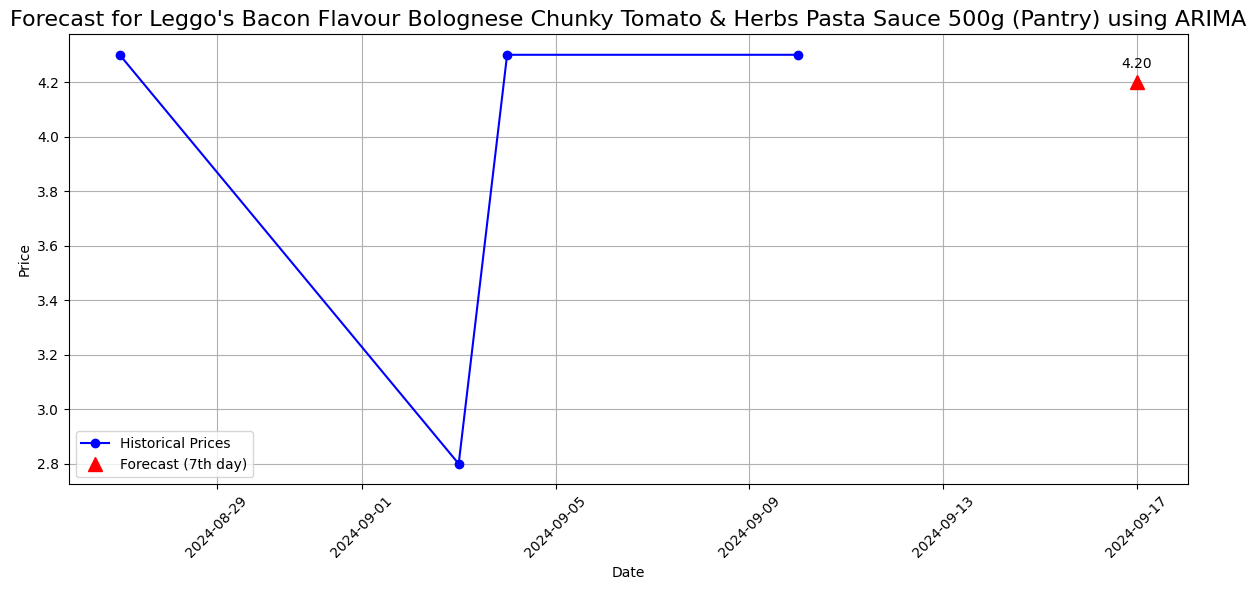

In [ ]:
test_code = sampled_product_codes[0]
forecast_data =forecasts[test_code]
product_data = combined_df[(combined_df['Product Code'] == test_code)]
# get Item Catagory and Item Name
item_category = product_data['Category'].iloc[0]
item_name = product_data['Item Name'].iloc[0]
print(f"Product Code: {test_code}, Category: {ItemCatagory}, Item Name: {ItemName}")
ts = combined_df[(combined_df['Product Code'] == test_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')

print(product_data)
print(forecast_data)


# prep the ts data
ts = product_data['Item Price'].astype(float).dropna()

# plot historial
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
# Generating and plotting the 7th day forecast
last_date = ts.index[-1]  # Use the last available data point
future_date = last_date + pd.Timedelta(days=7)  # 7th day after the last date
forecast_price = forecast_data['forecast']  # Assuming the forecast data contains the 7th day forecast directly

# Plot the future forecast point
plt.plot(future_date, forecast_price, 'r^', markersize=10, label='Forecast (7th day)')  # Red triangle marker for forecast

# Highlight the forecast pt
plt.annotate(f"{forecast_price:.2f}", (future_date, forecast_price), textcoords="offset points", xytext=(0,10), ha='center')
plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Product Code: 321163, Category: Pantry, Item Name: Leggo's Bacon Flavour Bolognese Chunky Tomato & Herbs Pasta Sauce 500g


<ipython-input-39-0c17b74cdbb6>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-39-0c17b74cdbb6>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


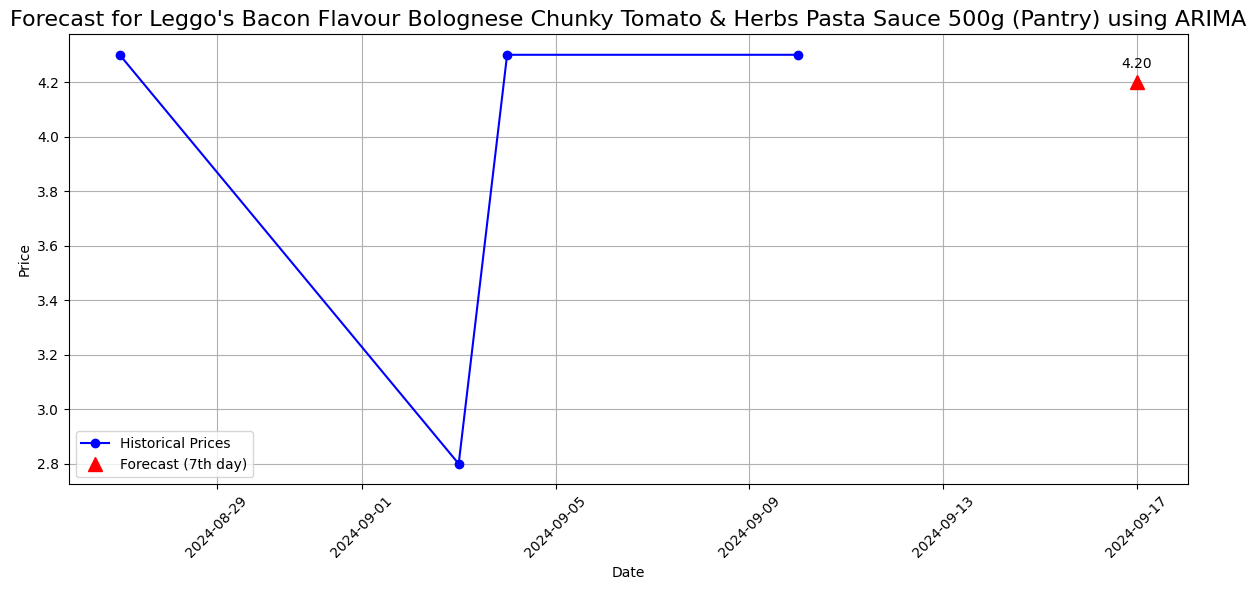

Product Code: 110572, Category: Dairy, Eggs & Fridge, Item Name: Castello Soft Mild Blue Cheese 300g


<ipython-input-39-0c17b74cdbb6>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-39-0c17b74cdbb6>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


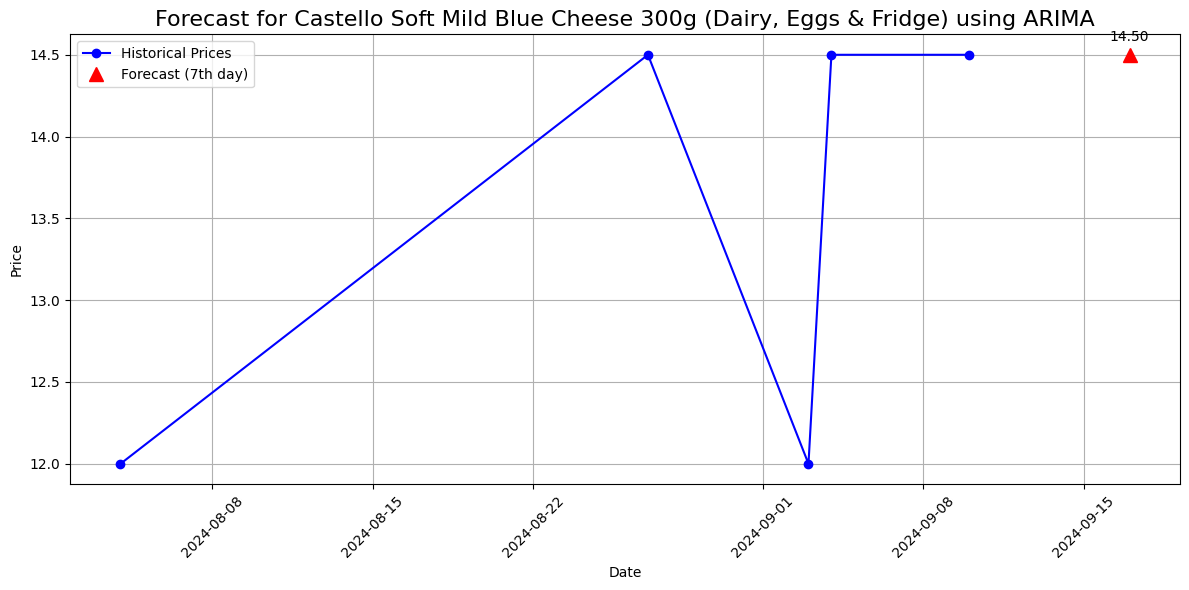

Product Code: 33637, Category: Dairy, Eggs & Fridge, Item Name: Devondale Skim Milk Long Life Uht Milk 1l


<ipython-input-39-0c17b74cdbb6>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-39-0c17b74cdbb6>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


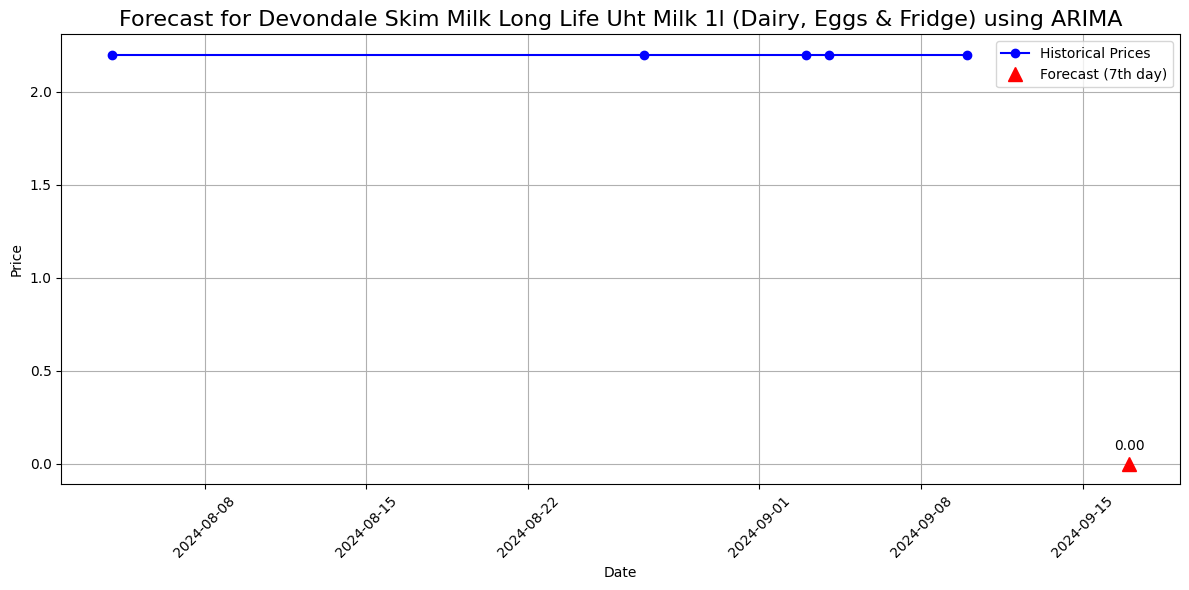

Product Code: 261341, Category: Beauty & Personal Care, Item Name: Herbal Essences Shampoo Colour Me Happy 300ml


<ipython-input-39-0c17b74cdbb6>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-39-0c17b74cdbb6>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


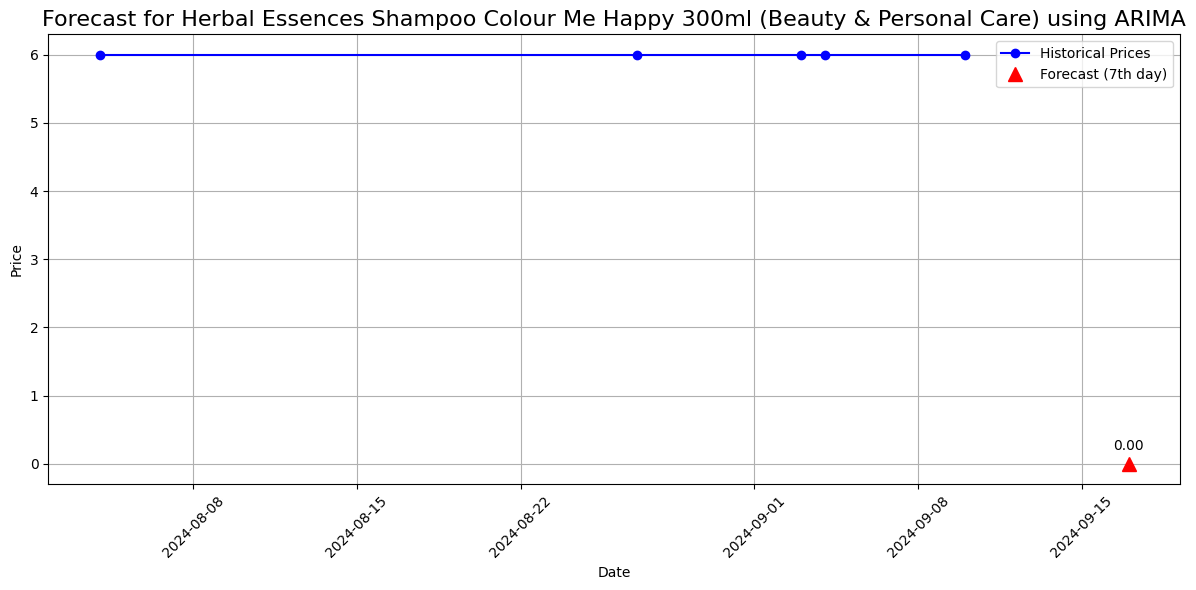

Product Code: 235131, Category: Pantry, Item Name: Macro Natural Semolina Flour 925g


<ipython-input-39-0c17b74cdbb6>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-39-0c17b74cdbb6>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


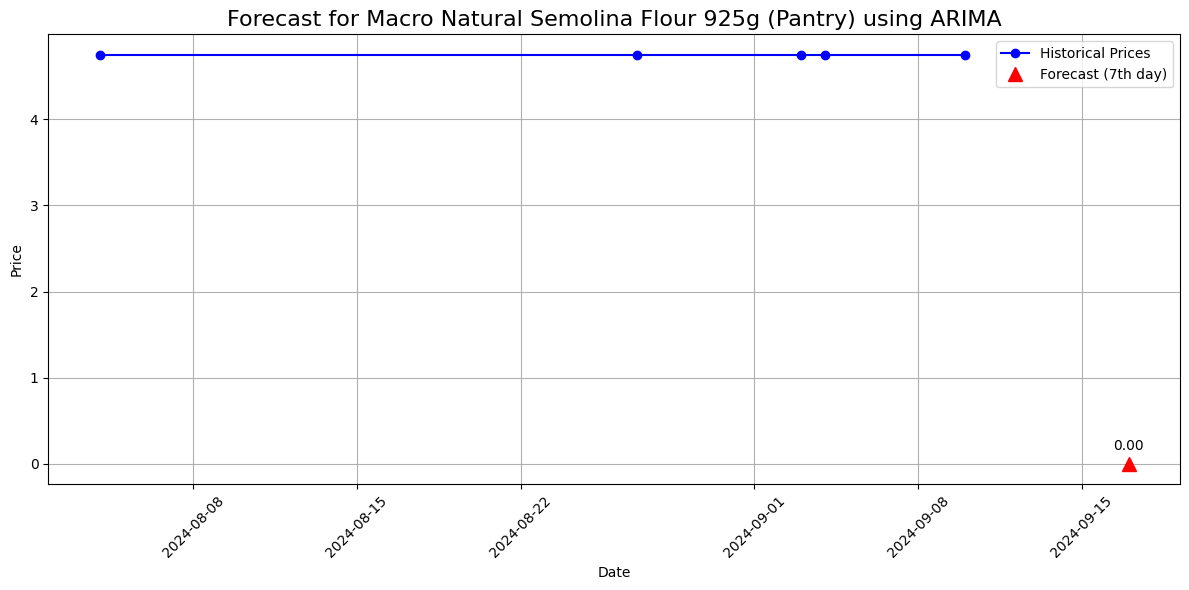

In [ ]:
for code in sampled_product_codes[:5]:
  test_code = code
  forecast_data =forecasts[test_code]
  product_data = combined_df[(combined_df['Product Code'] == test_code)]
  # get Item Catagory and Item Name
  item_category = product_data['Category'].iloc[0]
  item_name = product_data['Item Name'].iloc[0]
  print(f"Product Code: {test_code}, Category: {item_category}, Item Name: {item_name}")
  # ts = combined_df[(combined_df['Product Code'] == test_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')

  # print(product_data)
  # print(forecast_data)


  # prep the ts data
  ts = product_data['Item Price'].astype(float).dropna()

  # plot historial
  plt.figure(figsize=(12, 6))
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
  # Generating and plotting the 7th day forecast
  last_date = ts.index[-1]  # Use the last available data point
  future_date = last_date + pd.Timedelta(days=7)  # 7th day after the last date
  forecast_price = forecast_data['forecast']  # Assuming the forecast data contains the 7th day forecast directly

  # Plot the future forecast point
  plt.plot(future_date, forecast_price, 'r^', markersize=10, label='Forecast (7th day)')  # Red triangle marker for forecast

  # Highlight the forecast pt
  plt.annotate(f"{forecast_price:.2f}", (future_date, forecast_price), textcoords="offset points", xytext=(0,10), ha='center')
  plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Explaination :As we can see in the graph above and the Arima mdeol training comment, if all points (prices) on all given dates are same, they are treated as constant value input and the forecast for 7th day is 0(0,0,0) output, that is a Zero value as price.


Hence tweaking the model, to use last price if all prices are same , otherwise Arima model.

ARIMA is not suitable for the database that contians nearly all constant values, especailly if data points are of upto low count such as in this case - only for 5 different dates.

Alternatively, MA, EMA models can be more suitable in these cases.

In [ ]:

import random
## dict to store forecasts
forecasts = {}

## ignore warnings using pandas
# pd.ig


## get all unique product codes
product_codes = combined_df['Product Code'].unique()

# PRINT COUNT OF UNIQUE PRODS
print(f"Number of unique product codes: {len(product_codes)}")

## set seed
random.seed(42)
ProdCount = 50 #
# ProdCount = len(product_codes) # <<<<uncomment to run on whole data
# Sample a few prod codes for output and plots
sampled_product_codes = random.sample(list(product_codes),ProdCount)
## number of sheets in Gsheet
NumberofDates = len(list(all_data.keys()))

# Process each product code
for product_code in sampled_product_codes:
    # Filter data for the current product code
    product_data = combined_df[combined_df['Product Code'] == product_code]

    ts = product_data['Item Price'].astype(float).resample('D').last().fillna(method = 'ffill')

    # prep the ts data
    # ts = product_data['Item Price'].astype(float)
    # print(ts)
    # if sufficeint data points and not all pricesa are same
    if len(ts) >= NumberofDates and not ts.nunique() == 1:
        # print(ts)
        try:
            model = auto_arima(ts, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
            forecast = model.predict(n_periods=7)# predict after 2 weeks
            # print(forecast[-1])
            forecasts[product_code] = {'forecast': forecast[-1], 'method': 'ARIMA'}
        except Exception as e:
            print(f"ARIMA model fitting failed for product code {product_code}: {str(e)}")
    else:
        # Use last available price for forecasting
        last_known_price = ts.iloc[-1]
        forecast = last_known_price
        forecasts[product_code] = {'forecast': forecast, 'method': 'Last Known Price'}


Number of unique product codes: 22625


<ipython-input-60-a8d973a2cc4b>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = product_data['Item Price'].astype(float).resample('D').last().fillna(method = 'ffill')
<ipython-input-60-a8d973a2cc4b>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[product_code] = {'forecast': forecast[-1], 'method': 'ARIMA'}
<ipython-input-60-a8d973a2cc4b>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = product_data['Item Price'].astype(float).resample('D').last().fillna(method = 'ffill')
<ipython-input-60-a8d973a2cc4b>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

Product Code: 321163, Category: Pantry, Item Name: Leggo's Bacon Flavour Bolognese Chunky Tomato & Herbs Pasta Sauce 500g


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


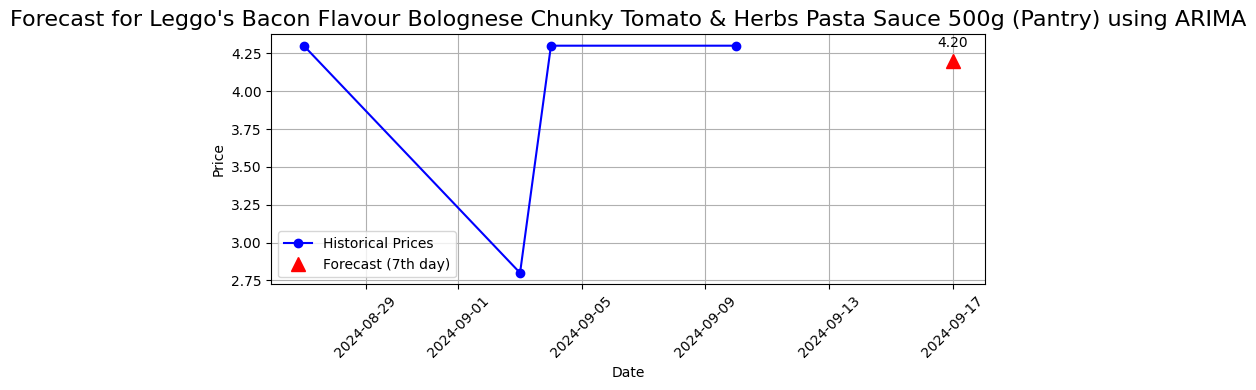

Product Code: 110572, Category: Dairy, Eggs & Fridge, Item Name: Castello Soft Mild Blue Cheese 300g


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


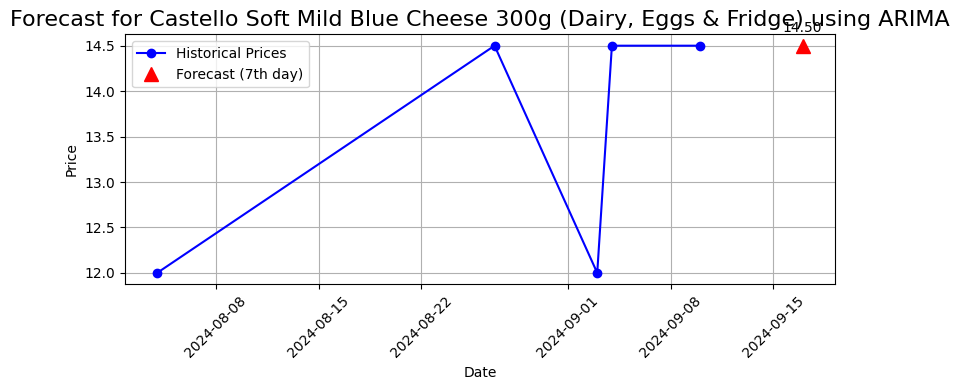

Product Code: 33637, Category: Dairy, Eggs & Fridge, Item Name: Devondale Skim Milk Long Life Uht Milk 1l


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


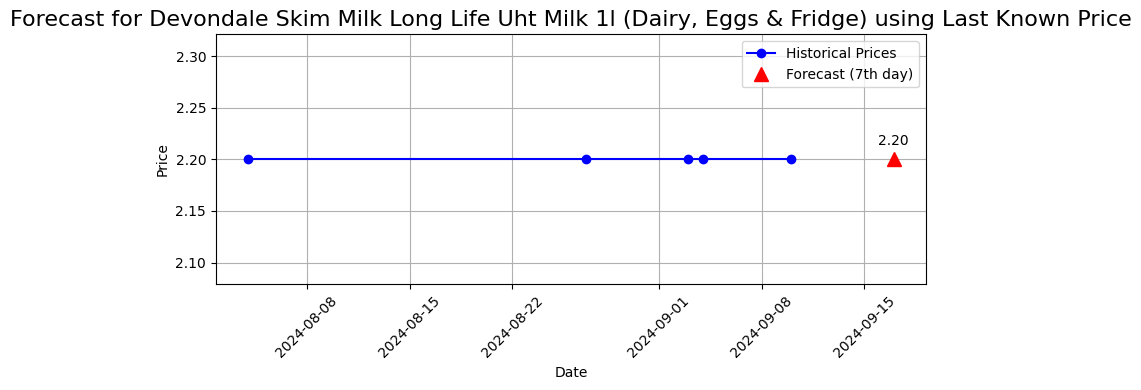

Product Code: 261341, Category: Beauty & Personal Care, Item Name: Herbal Essences Shampoo Colour Me Happy 300ml


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


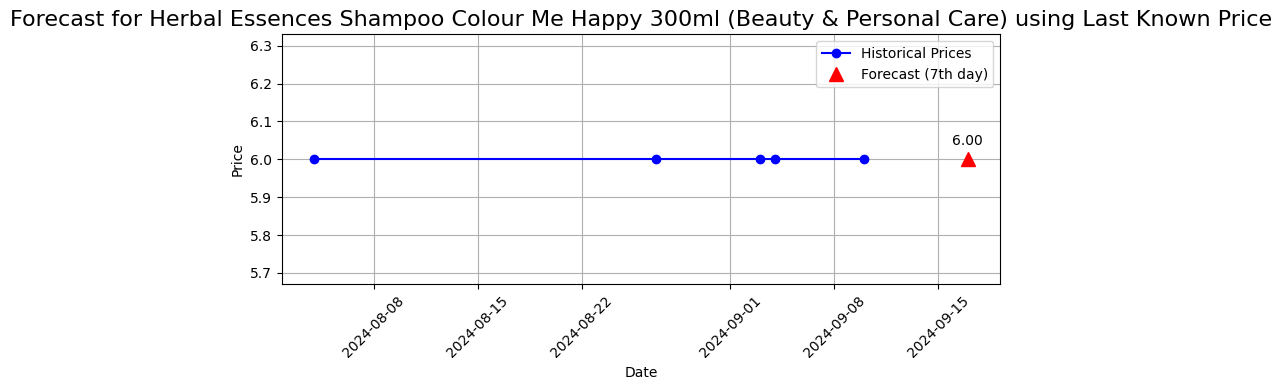

Product Code: 235131, Category: Pantry, Item Name: Macro Natural Semolina Flour 925g


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


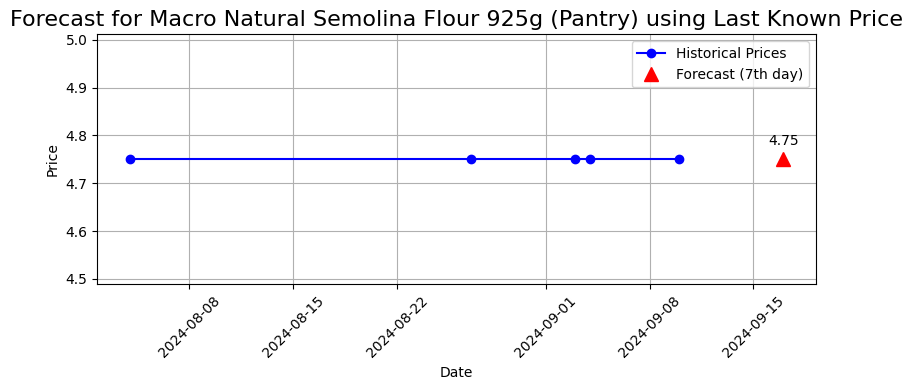

Product Code: 221696, Category: Home & Lifestyle, Item Name: Essentials Paper Cups 60 Pack


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


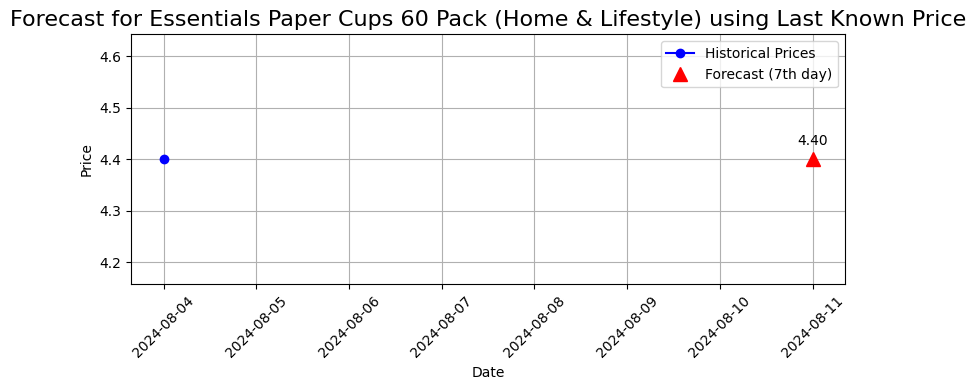

Product Code: 143627, Category: Pantry, Item Name: Carman's Protein Rich Porridge Sachets Almond, Vanilla & Cinnamon 6 Pack


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


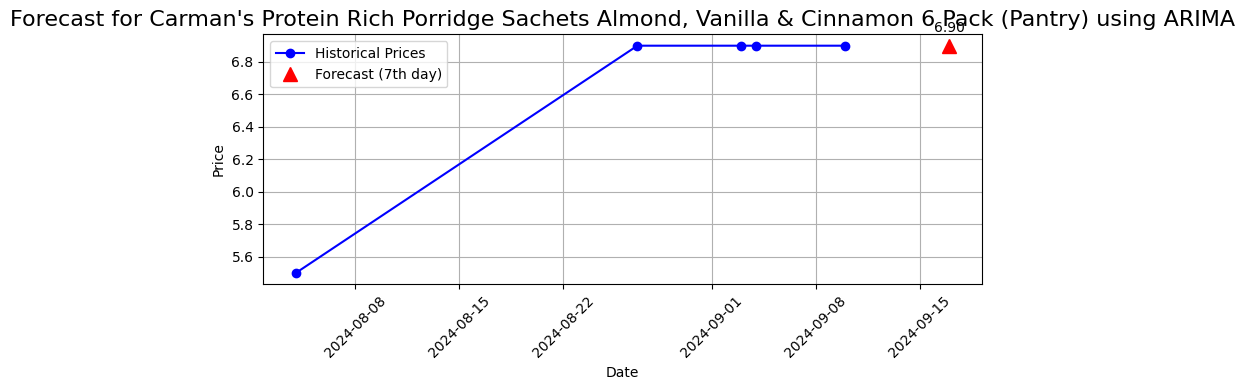

Product Code: 102976, Category: Bakery, Item Name: Helga's Traditional White Mini Loaf 360g


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


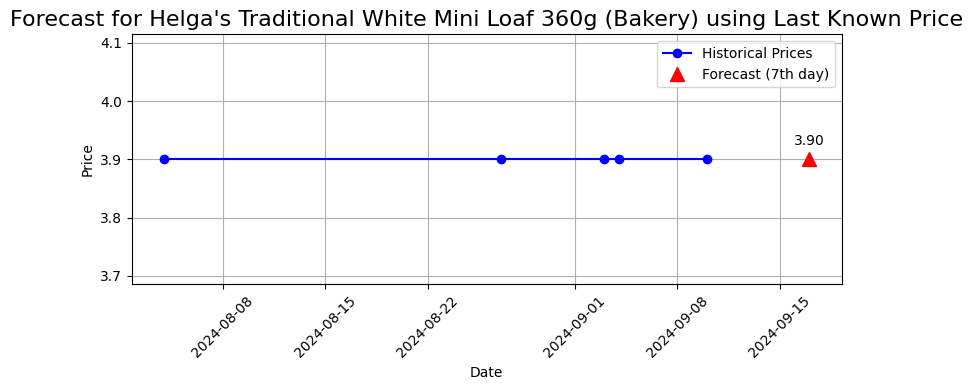

Product Code: 217927, Category: Dairy, Eggs & Fridge, Item Name: King Island Dairy Lighthouse Blue Cheese 200g


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


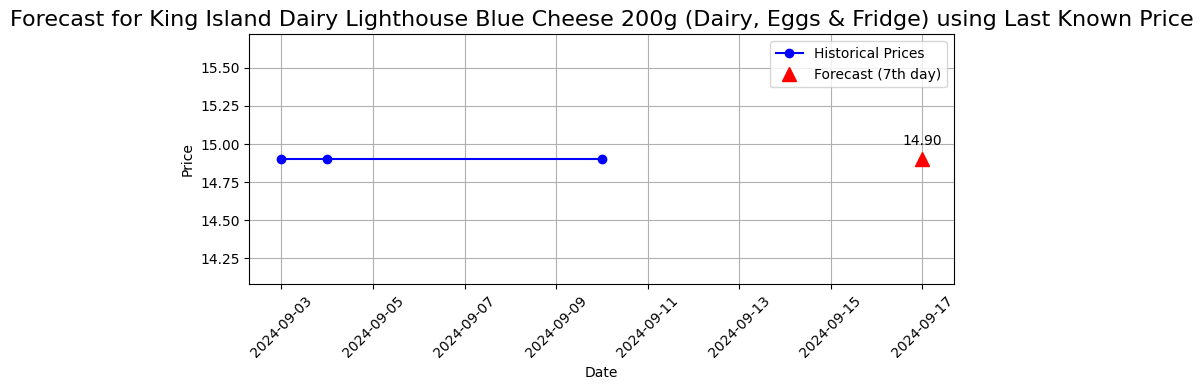

Product Code: 816101, Category: Bakery, Item Name: Woolworths Free From Gluten Eng Muffins 4 Pack


<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
<ipython-input-58-ab97c4f4e0b1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')


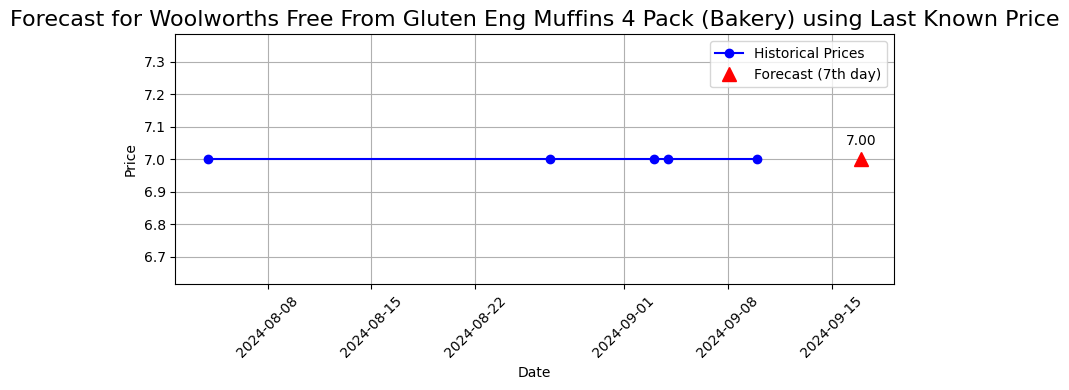

In [ ]:
for code in sampled_product_codes[:10]:
  test_code = code
  forecast_data =forecasts[test_code]
  product_data = combined_df[(combined_df['Product Code'] == test_code)]
  # get Item Catagory and Item Name
  item_category = product_data['Category'].iloc[0]
  item_name = product_data['Item Name'].iloc[0]
  print(f"Product Code: {test_code}, Category: {item_category}, Item Name: {item_name}")
  # ts = combined_df[(combined_df['Product Code'] == test_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')

  # print(product_data)
  # print(forecast_data)


  # prep the ts data
  ts = product_data['Item Price'].astype(float).dropna()

  # plot historial
  plt.figure(figsize=(8, 4))
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
  # Generating and plotting the 7th day forecast
  last_date = ts.index[-1]  # Use the last available data point
  future_date = last_date + pd.Timedelta(days=7)  # 7th day after the last date
  forecast_price = forecast_data['forecast']  # Assuming the forecast data contains the 7th day forecast directly

  # Plot the future forecast point
  plt.plot(future_date, forecast_price, 'r^', markersize=10, label='Forecast (7th day)')  # Red triangle marker for forecast

  # Highlight the forecast pt
  plt.annotate(f"{forecast_price:.2f}", (future_date, forecast_price), textcoords="offset points", xytext=(0,10), ha='center')
  plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
future_date, forecast_price

(Timestamp('2024-09-17 00:00:00'), 7.0)